In [30]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Softmax
from sklearn.model_selection import train_test_split

In [31]:
Rootpath = "~/OneDrive/Desktop/Programming/DS/datasets/digit_recognizer"
data_train = pd.read_csv(Rootpath + "/train.csv")
X_test = pd.read_csv(Rootpath + "/test.csv")
submit = pd.read_csv(Rootpath + "/sample_submission.csv")

In [32]:
data_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
data_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [34]:
data_train['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

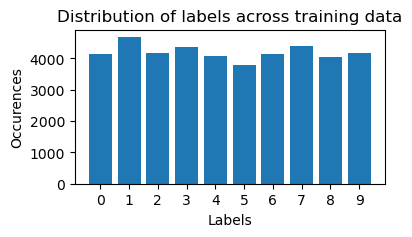

In [39]:
plt.figure(figsize=(4,2))
plt.hist(data_train['label'], bins=range(11), rwidth=0.8, align='left')
plt.xticks(range(10))
plt.title("Distribution of labels across training data")
plt.ylabel('Occurences')
plt.xlabel('Labels')
plt.show()

In [40]:
X_train = data_train.drop('label', axis=1)
y_train = data_train['label'].values

X_train = X_train/255
X_test = X_test/255

X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

In [41]:
EPOCHS = 20

model_1 = keras.models.Sequential([
    Conv2D(64, (5, 5), padding='Same', activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (5, 5), padding='Same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(10),
    BatchNormalization(),
    Softmax()
])

model_2 = keras.models.Sequential([
    Conv2D(64, (5, 5), padding='Same', activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (5, 5), padding='Same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100),
    BatchNormalization(),
    Dense(10),
    BatchNormalization(),
    Softmax()
])

model_3 = keras.models.Sequential([
    Conv2D(32, (5, 5), padding='Same', activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (5, 5), padding='Same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (5, 5), padding='Same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(10),
    BatchNormalization(),
    Softmax()
])

In [42]:
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [43]:
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, 
                                                                    test_size = 0.3, 
                                                                    random_state = 0)

In [44]:
%%time
val_h1 = model_1.fit(X_train_val, y_train_val, epochs=EPOCHS)

Epoch 1/20
919/919 [==============================] - 68s 73ms/step - loss: 0.3964 - accuracy: 0.9539
Epoch 2/20
919/919 [==============================] - 66s 71ms/step - loss: 0.1863 - accuracy: 0.9760
Epoch 3/20
919/919 [==============================] - 66s 71ms/step - loss: 0.1245 - accuracy: 0.9820
Epoch 4/20
919/919 [==============================] - 66s 71ms/step - loss: 0.0889 - accuracy: 0.9873
Epoch 5/20
919/919 [==============================] - 66s 72ms/step - loss: 0.0666 - accuracy: 0.9898
Epoch 6/20
919/919 [==============================] - 66s 72ms/step - loss: 0.0492 - accuracy: 0.9929
Epoch 7/20
919/919 [==============================] - 66s 72ms/step - loss: 0.0404 - accuracy: 0.9946
Epoch 8/20
919/919 [==============================] - 66s 72ms/step - loss: 0.0334 - accuracy: 0.9944
Epoch 9/20
919/919 [==============================] - 65s 71ms/step - loss: 0.0288 - accuracy: 0.9954
Epoch 10/20
919/919 [==============================] - 66s 71ms/step - loss: 0.024

In [45]:
%%time
val_h2 = model_2.fit(X_train_val, y_train_val, epochs=EPOCHS)

Epoch 1/20
919/919 [==============================] - 70s 75ms/step - loss: 0.3901 - accuracy: 0.9552
Epoch 2/20
919/919 [==============================] - 69s 75ms/step - loss: 0.1857 - accuracy: 0.9767
Epoch 3/20
919/919 [==============================] - 69s 75ms/step - loss: 0.1144 - accuracy: 0.9849
Epoch 4/20
919/919 [==============================] - 69s 75ms/step - loss: 0.0815 - accuracy: 0.9894
Epoch 5/20
919/919 [==============================] - 69s 75ms/step - loss: 0.0633 - accuracy: 0.9906
Epoch 6/20
919/919 [==============================] - 74s 81ms/step - loss: 0.0456 - accuracy: 0.9939
Epoch 7/20
919/919 [==============================] - 76s 82ms/step - loss: 0.0356 - accuracy: 0.9951
Epoch 8/20
919/919 [==============================] - 76s 82ms/step - loss: 0.0284 - accuracy: 0.9961
Epoch 9/20
919/919 [==============================] - 76s 82ms/step - loss: 0.0244 - accuracy: 0.9964
Epoch 10/20
919/919 [==============================] - 70s 77ms/step - loss: 0.019

In [46]:
%%time
val_h3 = model_3.fit(X_train_val, y_train_val, epochs=EPOCHS)

Epoch 1/20
919/919 [==============================] - 49s 52ms/step - loss: 0.3751 - accuracy: 0.9596
Epoch 2/20
919/919 [==============================] - 49s 53ms/step - loss: 0.1706 - accuracy: 0.9795
Epoch 3/20
919/919 [==============================] - 49s 53ms/step - loss: 0.1093 - accuracy: 0.9854
Epoch 4/20
919/919 [==============================] - 47s 52ms/step - loss: 0.0744 - accuracy: 0.9897
Epoch 5/20
919/919 [==============================] - 48s 52ms/step - loss: 0.0555 - accuracy: 0.9926
Epoch 6/20
919/919 [==============================] - 47s 52ms/step - loss: 0.0423 - accuracy: 0.9935
Epoch 7/20
919/919 [==============================] - 48s 52ms/step - loss: 0.0315 - accuracy: 0.9955
Epoch 8/20
919/919 [==============================] - 48s 52ms/step - loss: 0.0265 - accuracy: 0.9959
Epoch 9/20
919/919 [==============================] - 48s 52ms/step - loss: 0.0205 - accuracy: 0.9972
Epoch 10/20
919/919 [==============================] - 48s 52ms/step - loss: 0.019

In [47]:
model_1_pred = model_1.predict(X_test_val)
model_2_pred = model_2.predict(X_test_val)
model_3_pred = model_3.predict(X_test_val)

f = lambda x: np.argmax(x)

y_1_pred = np.fromiter((f(i) for i in model_1_pred), np.int64)
y_2_pred = np.fromiter((f(i) for i in model_2_pred), np.int64)
y_3_pred = np.fromiter((f(i) for i in model_3_pred), np.int64)

394/394 [==============================] - 6s 15ms/step


In [48]:
y_pred = np.array([y_1_pred, y_2_pred, y_3_pred])
y_pred = np.transpose(y_pred, (1, 0))
y_pred = scipy.stats.mode(y_pred, axis=1, keepdims=True)[0]
y_pred = np.squeeze(y_pred)

In [49]:
print(accuracy_score(y_pred, y_test_val))

0.9937301587301587


In [52]:
mask = y_pred == y_test_val
print(mask[:15])

x_false = X_test_val[~mask]
print(x_false.shape)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
(79, 28, 28, 1)


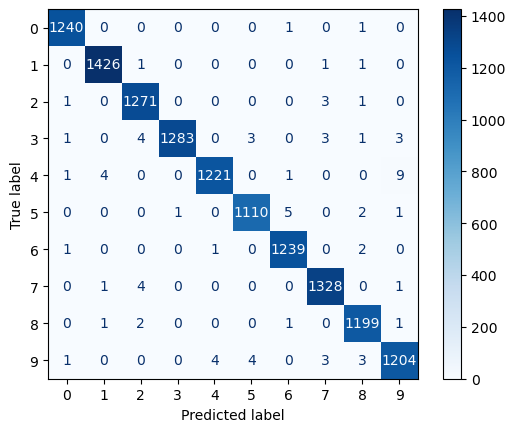

In [61]:
ConfusionMatrixDisplay.from_predictions(y_test_val, y_pred, cmap=plt.cm.Blues)

In [62]:
model_1_pred = model_1.predict(X_test)
model_2_pred = model_2.predict(X_test)
model_3_pred = model_3.predict(X_test)

f = lambda x: np.argmax(x)

y_1_pred = np.fromiter((f(i) for i in model_1_pred), np.int64)
y_2_pred = np.fromiter((f(i) for i in model_2_pred), np.int64)
y_3_pred = np.fromiter((f(i) for i in model_3_pred), np.int64)

875/875 [==============================] - 13s 15ms/step


In [63]:
y_pred = np.array([y_1_pred, y_2_pred, y_3_pred])
y_pred = np.transpose(y_pred, (1, 0))
y_pred = scipy.stats.mode(y_pred, axis=1, keepdims=True)[0]
y_pred = np.squeeze(y_pred)

In [75]:
df_submit = pd.DataFrame({'ImageId' :  range(1, 28001), 'Label' : y_pred})
df_submit

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [76]:
df_submit.to_csv(Rootpath + "/submission.csv", index=False)